## Numerical Approximation Methods - Graphical Representations

This notebook showcases graphical representations of the numerical approximation techniques that have been implemented in this repository.

In [89]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Lagrange Interpolation

In [90]:
def lagrange_interpolation(x_values, y_values):
    """
    This function performs Lagrange interpolation.
    param: x_values: list of x values
    param: y_values: list of y values
    return: function that interpolates the given points
    """

    def _basis(j, x):
        """
        This function returns the basis function for the jth point.
        """
        p = [(x - x_values[m]) / (x_values[j] - x_values[m]) for m in range(k) if m != j]
        return np.prod(p)
    
    k = len(x_values)
    return lambda x: sum(_basis(j, x) * y_values[j] for j in range(k))

In [91]:
def lagrange_interpolation_plot(x_values, y_values, original_func):
    """
    This function plots the Lagrange interpolation and the original function.
    param: x_values: list of x values
    param: y_values: list of y values
    param: original_func: the original function to be plotted
    """
    x = np.linspace(min(x_values), max(x_values), 100)
    y_interpolation = [lagrange_interpolation(x_values, y_values)(i) for i in x]
    y_original = original_func(x)
    
    plt.plot(x, y_interpolation, 'b', label='Interpolation')
    plt.plot(x, y_original, 'r', label='Original Function')
    plt.plot(x_values, y_values, 'ro', label='Data Points')
    
    plt.legend()
    plt.show()

### Spline Interpolation

In [92]:
def cubic_spline(x_values, y_values):
    """
    This function performs cubic spline interpolation.
    param: x_values: list of x values
    param: y_values: list of y values
    return: function that interpolates the given points
    """
    n = len(x_values)
    h = [x_values[i+1] - x_values[i] for i in range(n-1)]
    A = np.zeros((n, n))
    A[0, 0] = 1
    A[n-1, n-1] = 1
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
    b = np.zeros(n)
    for i in range(1, n-1):
        b[i] = 3 * ((y_values[i+1] - y_values[i]) / h[i] - (y_values[i] - y_values[i-1]) / h[i-1])
    c = np.linalg.solve(A, b)
    b = [(y_values[i+1] - y_values[i]) / h[i] - h[i] * (c[i+1] + 2 * c[i]) / 3 for i in range(n-1)]
    d = [(c[i+1] - c[i]) / (3 * h[i]) for i in range(n-1)]
    def _basis(i):
        """
        This function returns the basis function for the ith interval.
        """
        return lambda x: y_values[i] + b[i] * (x - x_values[i]) + c[i] * (x - x_values[i])**2 + d[i] * (x - x_values[i])**3
    
    def _spline(x):
        """
        This function checks if x is in the range of x_values and returns the corresponding spline value.
        """
        if x < x_values[0] or x > x_values[-1]:
            raise ValueError("x value out of range")
        i = 0
        while i < n-1 and x > x_values[i+1]:
            i += 1
        return _basis(i)(x)
    
    return _spline

In [93]:
def cubic_spline_plot(x_values, y_values, original_func):
    """
    This function plots the cubic spline interpolation.
    param: x_values: list of x values
    param: y_values: list of y values
    param: original_func: the original function to be plotted
    """
    import matplotlib.pyplot as plt
    from numpy import linspace
    x = linspace(min(x_values), max(x_values), 100)
    y = [cubic_spline(x_values, y_values)(i) for i in x]
    original_y = original_func(x)
    plt.plot(x, y, 'b', label='Cubic Spline')
    plt.plot(x, original_y, 'r', label='Original Function')
    plt.plot(x_values, y_values, 'ro')
    plt.legend()
    plt.show()

### Examples

In [94]:
def e(x):
    return np.exp(x)

def f(x):
    return 1 / (1 + x)

def g(x):
    return x**3 - 5*x

def sin(x):
    return np.sin(x)

#### Evenly spaced data

In [95]:
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_values = [sin(x) for x in x_values]

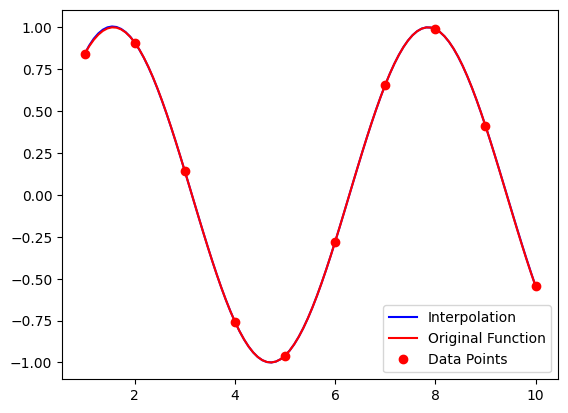

In [96]:
lagrange_interpolation_plot(x_values, y_values, sin)

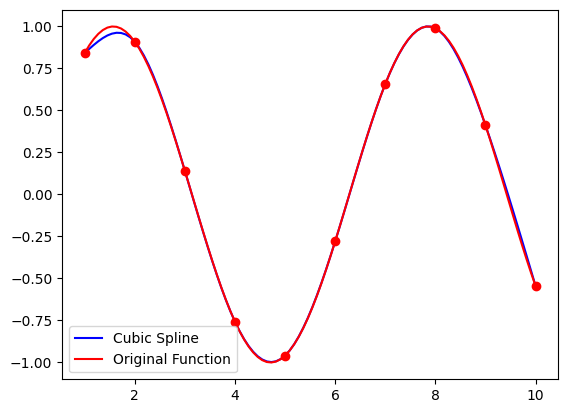

In [97]:
cubic_spline_plot(x_values, y_values, sin)

In [98]:
y_values = [e(x) for x in x_values]

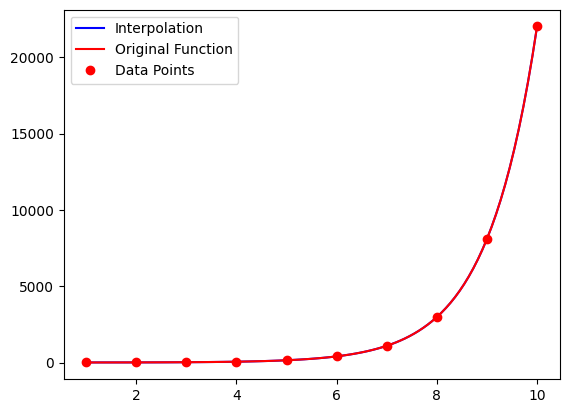

In [99]:
lagrange_interpolation_plot(x_values, y_values, e)

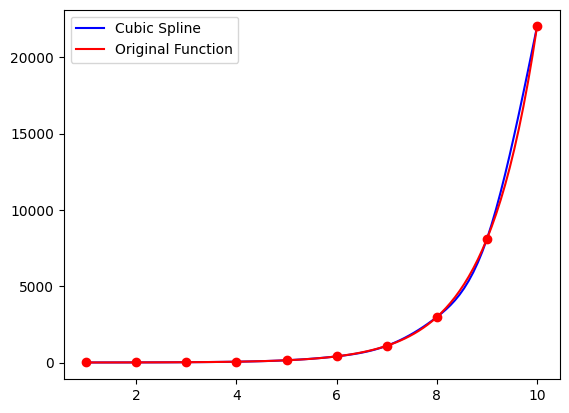

In [100]:
cubic_spline_plot(x_values, y_values, e)

#### Irregularly spaced data

In [107]:
x_values = [1.12, 2.8, 4.34, 5.5, 6, 7, 8, 9.9, 10]
y_values = [sin(x) for x in x_values]

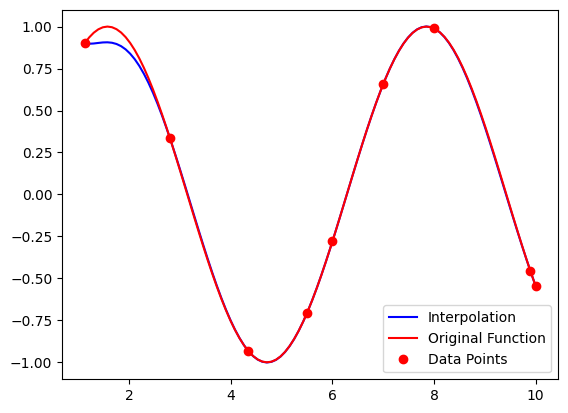

In [108]:
lagrange_interpolation_plot(x_values, y_values, sin)

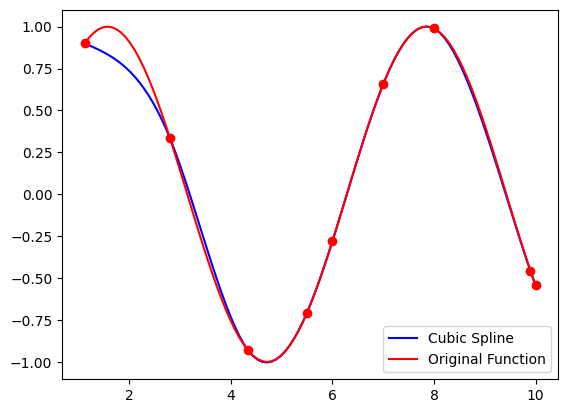

In [109]:
cubic_spline_plot(x_values, y_values, sin)